<a href="https://colab.research.google.com/github/Bempong-Sylvester-Obese/Food-segmentation-with-pre-trained-model/blob/main/Food_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENVIRONEMNT SETUP**

In [1]:
import os
import torch
import sys
import shutil

# Device and GPU setup
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# Project Repository
ROOT_CONTENT_DIR = "/content"

# remove any existing /content/content directory
NESTED_CONTENT_DIR = os.path.join(ROOT_CONTENT_DIR, "content")
if os.path.exists(NESTED_CONTENT_DIR):
    print(f"Removing existing nested content directory: {NESTED_CONTENT_DIR}")
    shutil.rmtree(NESTED_CONTENT_DIR)


PROJECT_DIR_NAME = "food_segmentation"
PROJECT_DIR = os.path.join(ROOT_CONTENT_DIR, PROJECT_DIR_NAME)

# Remove existing project directory
if os.path.exists(PROJECT_DIR):
    print(f"Removing existing project directory: {PROJECT_DIR}")
    shutil.rmtree(PROJECT_DIR)

# Create the project directory and change into it
os.makedirs(PROJECT_DIR, exist_ok=True)
os.chdir(PROJECT_DIR)
ABS_PROJECT_DIR = os.getcwd()

sys.path.append(ABS_PROJECT_DIR)

print("Cloning model repositories..")
!git clone https://github.com/IDEA-Research/GroundingDINO.git GroundingDINO
!git clone https://github.com/ChaoningZhang/MobileSAM.git MobileSAM

# Dependency Installation
print("Installing dependencies")
!pip install -q -e ./GroundingDINO
!pip install -q -e ./MobileSAM

# Model weight download
print("Downloading model weights..")

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P ./GroundingDINO
!wget -q https://github.com/ChaoningZhang/MobileSAM/raw/master/weights/mobile_sam.pt -P ./MobileSAM

print("\nSetup complete.")

Using device: cpu
Cloning model repositories..
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 33.21 MiB/s, done.
Resolving deltas: 100% (220/220), done.
Cloning into 'MobileSAM'...
remote: Enumerating objects: 1011, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 1011 (delta 347), reused 261 (delta 260), pack-reused 604 (from 1)
Receiving objects: 100% (1011/1011), 95.44 MiB | 32.87 MiB/s, done.
Resolving deltas: 100% (461/461), done.
Installing dependencies
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

LOADING MODEL

In [2]:
import supervision as sv
import sys
import os

# Add GroundingDINO directory to sys.path
grounding_dino_dir = os.path.join(ABS_PROJECT_DIR, "GroundingDINO")
if grounding_dino_dir not in sys.path:
    sys.path.append(grounding_dino_dir)
    print(f"Added {grounding_dino_dir} to sys.path")

# Add MobileSAM directory to sys.path
mobile_sam_dir = os.path.join(ABS_PROJECT_DIR, "MobileSAM")
if mobile_sam_dir not in sys.path:
    sys.path.append(mobile_sam_dir)
    print(f"Added {mobile_sam_dir} to sys.path")

try:
    from groundingdino.util.inference import Model as GroundingDINO
except ModuleNotFoundError as e:
    print(f"Error importing GroundingDINO model: {e}")
    sys.exit("Could not import GroundingDINO model.")


from mobile_sam import sam_model_registry, SamPredictor

# GroundingDINO configuration
GROUNDING_DINO_CONFIG_PATH = os.path.join(ABS_PROJECT_DIR, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(ABS_PROJECT_DIR, "GroundingDINO/groundingdino_swint_ogc.pth")

# MobileSAM configuration
MOBILE_SAM_CHECKPOINT_PATH = os.path.join(ABS_PROJECT_DIR, "MobileSAM/mobile_sam.pt")
SAM_TYPE = "vit_t"

print("Loading GroundingDINO model..")
grounding_dino_model = GroundingDINO(GROUNDING_DINO_CONFIG_PATH, GROUNDING_DINO_CHECKPOINT_PATH, DEVICE)

print("Loading MobileSAM model..")
sam = sam_model_registry[SAM_TYPE](checkpoint=MOBILE_SAM_CHECKPOINT_PATH)
sam.to(DEVICE)
sam_predictor = SamPredictor(sam)

print("\nModels loaded successfully")

Added /content/food_segmentation/GroundingDINO to sys.path
Added /content/food_segmentation/MobileSAM to sys.path


Loading GroundingDINO model..
final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading MobileSAM model..

Models loaded successfully


IMAGE DEFINITION AND TEXT PROMPTS

Using image path from: /content/food_segmentation/Raw Images/1ce6a816-meal_image_31748_2023-08-08_9.jpg
Image file found at /content/food_segmentation/Raw Images/1ce6a816-meal_image_31748_2023-08-08_9.jpg


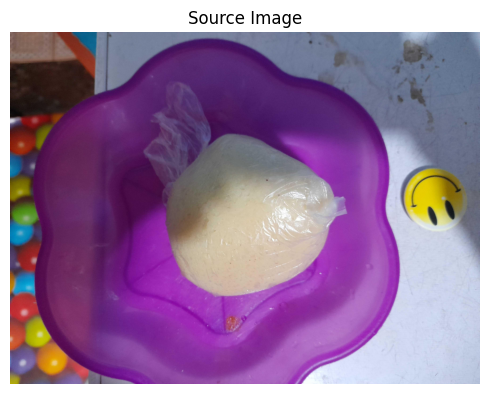

In [3]:
import os
import requests
import cv2
import matplotlib.pyplot as plt
import math

# Image path
IMAGE_NAME = "/content/food_segmentation/Raw Images/1ce6a816-meal_image_31748_2023-08-08_9.jpg"

IMAGE_PATH = os.path.join(ABS_PROJECT_DIR, IMAGE_NAME)


print(f"Using image path from: {IMAGE_PATH}")

# Check if the image file exists
if not os.path.exists(IMAGE_PATH):
    print(f"Error: Image file not found at {IMAGE_PATH}")
else:
    print(f"Image file found at {IMAGE_PATH}")
    # Text Prompt
    CLASSES =["Banku"]
    PROMPT = "A ball of banku"

    # Visualisation helper function
    def show_image(images, titles=None, cols=2):
        rows = math.ceil(len(images) / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
        axes = axes.flatten() if rows > 1 or cols > 1 else [axes]

        for i, img in enumerate(images):
            axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            if titles and i < len(titles):
                axes[i].set_title(titles[i])
            axes[i].axis('off')

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


    source_image = cv2.imread(IMAGE_PATH)
    show_image([source_image], titles=["Source Image"], cols=1)

INFERENCE PIPELINE

In [4]:
import numpy as np
import torch
import supervision as sv

# Detect with GroundingDINO
print("Running GroundingDINO detection..")
detections, _, = grounding_dino_model.predict_with_caption(
    image=source_image,
    caption=PROMPT,
    box_threshold=0.35,
    text_threshold=0.25
)
print(f"Detected {len(detections)} objects.")

if len(detections) > 0:
    detections.class_id = np.zeros(len(detections), dtype=int)
    if detections.confidence is None:
        detections.confidence = np.ones(len(detections))
    else:
        detections.confidence = np.array(detections.confidence)
else:
    detections.class_id = np.array([], dtype=int)
    detections.confidence = np.array([])


print("Running MobileSAM segmentation...")

# Set image for SAM predictor
sam_predictor.set_image(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))

# GroundingDINO detections as input boxes for SAM
if len(detections) > 0:
    input_boxes = detections.xyxy
else:
    input_boxes = np.array([])

masks = []

# predict mask individually
if len(input_boxes) > 0:
    for box in input_boxes:
        box = box.reshape(1, -1)
        mask, scores, logits = sam_predictor.predict(
            point_coords=None,
            point_labels=None,
            box=box,
            multimask_output=False, # one mask per bounding box
        )
        if isinstance(mask, torch.Tensor):
            mask = mask.cpu().numpy()
        masks.append(np.squeeze(mask))


# Connect masks into a single array
if len(masks) > 0:
    masks = np.array(masks)
    print(f"Generated {masks.shape[0]} masks.")
else:
    masks = np.array([])
    print("No masks generated.")


# Link Detections and Masks
if len(detections) > 0 and len(masks) == len(detections):
    detections.mask = masks
elif len(detections) > 0 and len(masks) != len(detections):
     print("Warning: Mask count does not match detection count.")
     detections.mask = np.array([])
else:
    detections.mask = np.array([])
    print("No detections or masks.")


# Filter any empty detections
if detections.mask is not None and isinstance(detections.mask, np.ndarray) and detections.mask.shape[0] > 0:
    detections = detections[detections.mask.sum(axis=(1, 2)) > 0]
else:
    detections = sv.Detections.empty()

print(f"Final number of detections with masks: {len(detections)}")

Running GroundingDINO detection..


Detected 1 objects.
Running MobileSAM segmentation...
Generated 1 masks.
Final number of detections with masks: 1


RESULT VISUALIZATION


Displaying Results:


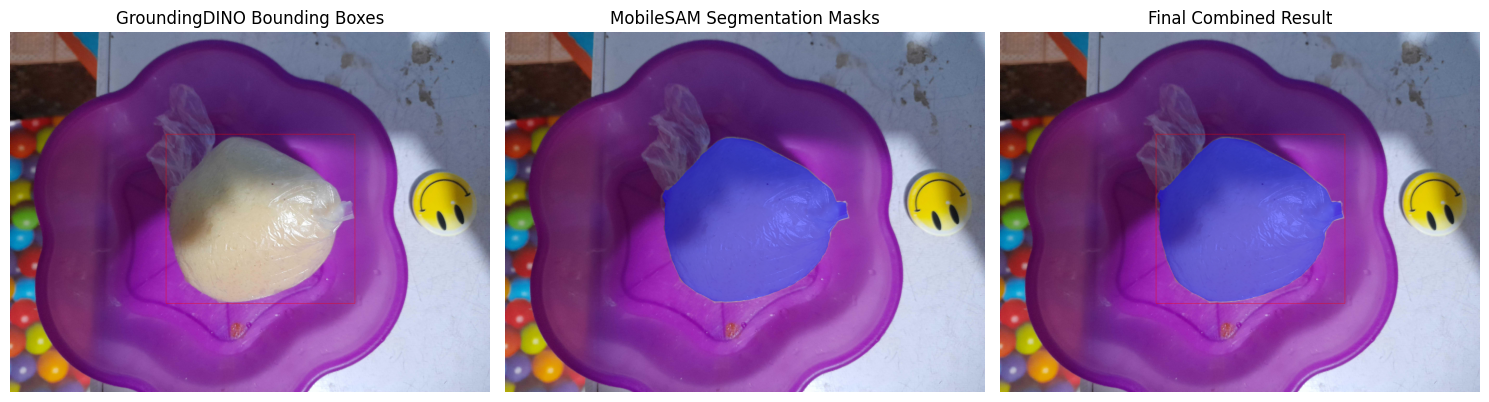

In [5]:
import supervision as sv
import os
import cv2
import numpy as np

box_annotator = sv.BoxAnnotator(color=sv.Color(b=0, g=0, r=255), thickness=2) # BGR for Red
mask_annotator = sv.MaskAnnotator(color=sv.Color(b=255, g=0, r=0)) # BGR for Blue

# Annotation with bounding boxes
annotated_image_boxes = box_annotator.annotate(
    scene=source_image.copy(),
    detections=detections,
)

# Annotate with masks
annotated_image_masks = mask_annotator.annotate(
    scene=source_image.copy(),
    detections=detections
)

# 3. Annotate with both boxes and masks
combined_annotated_image = mask_annotator.annotate(
    scene=source_image.copy(),
    detections=detections
)
combined_annotated_image = box_annotator.annotate(
    scene=combined_annotated_image,
    detections=detections,
)

print("\nDisplaying Results:")

# Create results directory if it doesn't exist
results_dir = os.path.join(ABS_PROJECT_DIR, "results")
os.makedirs(results_dir, exist_ok=True)

# Display the annotated images in a grid
images_to_display = [
    annotated_image_boxes,
    annotated_image_masks,
    combined_annotated_image
]
titles_for_display = [
    "GroundingDINO Bounding Boxes",
    "MobileSAM Segmentation Masks",
    "Final Combined Result"
]

show_image(images_to_display, titles=titles_for_display, cols=3) # Display in 3 columns